In [1]:
import pandas as pd

from util.performance import plot_moderation_performance, plot_moderation_performanceNoise
from tqdm import tqdm
from kneed import DataGenerator, KneeLocator

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\Jakob\AppData\Local\Temp\ipykernel_1676\464871014.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# load df
names = ['BERT_BL', 'BERT_MCD', 'BERT_EN']
label = ['DistilBERT-BL', 'DistilBERT-MCD', 'DistilBERT-EN']
colours = ['b', 'r', 'g']
dfs_all = []
for name in names:
    dfs = []
    for i in range(5):
        df = pd.read_pickle(f"../pickle/imdb/{name}_{i}.pkl")
        dfs.append(df)
        i = i+1
    dfs_all.append(dfs)

In [3]:
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

Effort (%):  0.253
F1_Score  :  0.9640640000000001
- - - - - -
Effort (%):  0.251
F1_Score  :  0.9646239999999999
- - - - - -
Effort (%):  0.246
F1_Score  :  0.965296
- - - - - -


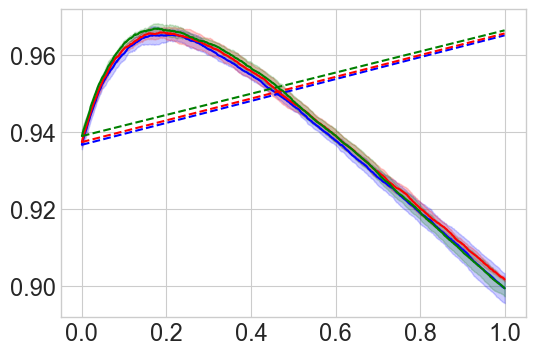

In [7]:
import random

k = 2
noise = 0.15

values = []

knee = [.253, .251, .246]

for i in range(len(dfs_all)):
    
    for df in dfs_all[i]:
        df["rand_mod"] = [random.randint(0, k) if random.random() < noise else v for _, v in enumerate(df["y_hat"])]
    
    a, b = plot_moderation_performanceNoise(dfs_all[i], 'u_lc', names[i], colours[i], average='micro', eps=1000)
    values.append((a, b))
    
    x = a
    y = b.values
    
    print('Effort (%): ', knee[i])
    print('F1_Score  : ', y[int(knee[i]*1000)])
    print('- - - - - -')


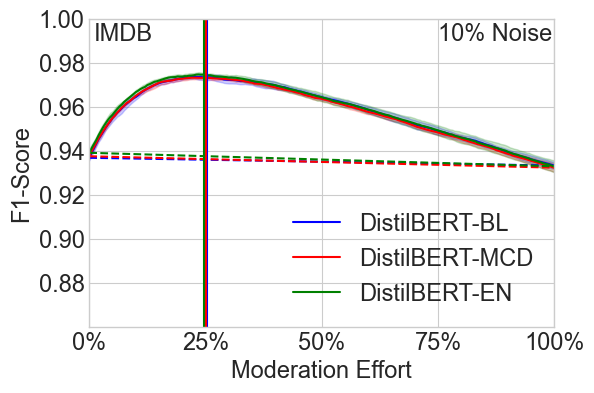

In [9]:
import random

k = 2
noise = 0.1

for i in range(len(dfs_all)):
    
    for df in dfs_all[i]:
        df["rand_mod"] = [random.randint(0, k) if random.random() < noise else v for _, v in enumerate(df["y_hat"])]
    
    plot_moderation_performanceNoise(dfs_all[i], 'u_lc', names[i], colours[i], average='micro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
plt.legend([handles[idx] for idx in order],[label[idx] for idx in order] ,  loc='lower right')


plt.xticks([0, .25, .50, .75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.yticks([0.88, .9, .92, .94, .96, .98, 1], ['0.88', '0.90', '0.92', '0.94', '0.96', '0.98', '1.00'])

plt.xlim((0, 1))
plt.ylim((0.86, 1))

plt.xlabel('Moderation Effort')
plt.ylabel('F1-Score')
plt.text(0.01, .990, 'IMDB')
plt.text(0.75, .990, f'{int(noise*100)}% Noise')

plt.vlines(0.253, 0.86, 1, colors=colours[0],)
plt.vlines(0.251, 0.86, 1, colors=colours[1],)
plt.vlines(0.246, 0.86, 1, colors=colours[2],)

plt.savefig(f'bert_imdb_y_noise_{int(noise*100)}.pdf', bbox_inches='tight')

In [6]:
values = []

for i in tqdm(range(len(dfs_all))):
    a, b = plot_moderation_performanceNoise(dfs_all[i], 'u_lc', names[i], colours[i], eps=1000)
    values.append((a, b))


  0%|          | 0/3 [00:00<?, ?it/s]


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
# Knee LC

values = []

for i in tqdm(range(len(dfs_all))):
    a, b = plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], eps=1000)
    values.append((a, b))

i = 0
for (a, b) in tqdm(values):
    x = a
    y = b.values
    kneedle = KneeLocator(x, y, S=1.0, curve='concave', direction='increasing', interp_method="polynomial")
    
    print('\n' + names[i])
    print('Effort (%): ', round(kneedle.knee, 3))
    print('F1_Score  : ', y[int(kneedle.knee*1000)])
    kneedle.plot_knee_normalized()
    i+= 1

In [15]:
import numpy as np
import tqdm
from sklearn.utils import shuffle

In [7]:
# load df
names = ['BERT_BL', 'BERT_MCD', 'BERT_EN']
label = ['DistilBERT-BL', 'DistilBERT-MCD', 'DistilBERT-EN']
colours = ['b', 'r', 'g']
dfs_all = []
for name in names:
    dfs = []
    for i in range(5):
        df = pd.read_pickle(f"../pickle/imdb/{name}_{i}.pkl")
        dfs.append(df)
        i = i+1
    dfs_all.append(dfs)

In [ ]:
for i in enumerate(names):
    data = []

    mean = None

    def ratio(array):
        true_counts = [sum(array[:i+1]) for i in range(len(array))]
        true_percentages = [(count / (i + 1)) * 100 for i, count in enumerate(true_counts)]
        data.append(true_percentages)
        mean = np.array(data).mean(axis=0)
        return mean

    for df in tqdm.tqdm(dfs):
        boolean_array = df.sort_values('u_lc', ascending=False)['defect'].values
        mean = ratio(boolean_array)

    for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
        print(f"{i}: ", round(mean[int(len(df) * i)], 1))


    data = []
    import numpy as np
    import tqdm
    from sklearn.utils import shuffle

    mean_rng = None

    def ratio(array):
        true_counts = [sum(array[:i+1]) for i in range(len(array))]
        true_percentages = [(count / (i + 1)) * 100 for i, count in enumerate(true_counts)]
        data.append(true_percentages)
        mean = np.array(data).mean(axis=0)
        return mean

    for df in tqdm.tqdm(dfs):
        boolean_array = df.sort_values('u_lc', ascending=False)['defect'].values
        mean_rnd = ratio(shuffle(boolean_array))

    for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
        print(f"{i}: ", round(mean_rnd[int(len(df) * i)], 1))


    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')

    plt.rc('font', size=17)
    plt.rcParams["figure.figsize"] = (6,4)


    plt.plot(mean / 100, 'r', label='Uncertainty',)
    plt.plot(mean_rnd / 100, 'k', label='Random')

# Diagramm anzeigen
plt.yticks([0, .10, .20, .30, .40, .50, .60]) 

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel('Moderation Effort')
plt.ylabel('Missclassification Ratio')
plt.legend()
plt.xlim(0, len(df))
plt.ylim(0, 0.6)

plt.show()

C:\Users\Andersen\AppData\Local\Temp\ipykernel_22152\2540939551.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
5it [00:24,  4.81s/it]


0.01:  49.7
0.05:  42.1
0.1:  34.2
0.15:  29.1
0.2:  24.7
0.5:  12.1


5it [00:24,  4.80s/it]


0.01:  48.9
0.05:  41.9
0.1:  34.4
0.15:  29.1
0.2:  24.3
0.5:  12.0


5it [00:23,  4.80s/it]


0.01:  45.1
0.05:  40.9
0.1:  34.1
0.15:  28.3
0.2:  23.8
0.5:  11.7


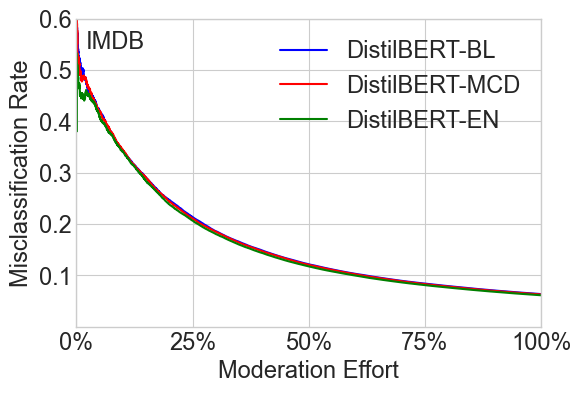

In [5]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

for idx, v in enumerate(names):
    
    data = []
    dfs = dfs_all[idx]
    
    mean = None
    mean_rng = None

    def ratio(array):
        true_counts = [sum(array[:i+1]) for i in range(len(array))]
        true_percentages = [(count / (i + 1)) * 100 for i, count in enumerate(true_counts)]
        data.append(true_percentages)
        mean = np.array(data).mean(axis=0)
        return mean

    for i, df in tqdm(enumerate(dfs)):
        boolean_array = df.sort_values('u_lc', ascending=False)['defect'].values
        mean = ratio(boolean_array)
        
        
    for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
        print(f"{i}: ", round(mean[int(len(df) * i)], 1))

    plt.plot(np.linspace(0, 100, len(dfs[0])), mean / 100, color=colours[idx], label=label[idx],)
    
# Diagramm anzeigen
plt.yticks([.10, .20, .30, .40, .50, .6]) 

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel('Moderation Effort')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.xlim(0, 100)
plt.xticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.ylim(0, 0.6)
plt.text(2, .542, 'IMDB')
plt.savefig('bert_imdb_eff.pdf', bbox_inches='tight')

plt.show()